### **Import Library**

In [6]:
import pandas as pd
from pathlib import Path
import numpy as np
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set()


### Include function 

In [7]:
def columns_rename(df):
    return df.rename(columns=lambda s: s.lower())    

In [8]:
def read_file(pathfile):
    return pd.read_csv(pathfile, keep_default_na=False)

In [9]:
def drop_column(df, columns):
    """
        df: dataframe 
        columns: name columns that use drop 
    """
    for name in columns:
        if name in df.columns:
            df = df.drop(name, axis=1)
    return df

In [10]:
def split_label(df, columns):
    x_features = df.drop(columns, axis=1)
    y_labels = df.loc[:, columns]
    return x_features, y_labels

In [11]:
def visualization_3d(point, point1):
    from mpl_toolkits import mplot3d
    x, y, z = point[0], point[1], point[2]
    x1, y1, z1 = point1[0], point1[1], point1[2]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.plot_wireframe(x, y, z, color='r')
    ax.scatter3D(x, y, z, cmap='Greens')
    
    ax.plot_wireframe(x1, y1, z1, color='b')
    ax.scatter3D(x1, y1, z1, cmap='Yellow')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return fig

### Include path to data

In [12]:
foldername_Data = "TCH_AI02"
path_Root = Path('').resolve()
path_2Data = path_Root / "Data" / foldername_Data

In [13]:
print(f"Root path: {path_Root}")
print(f'Foldef name: {foldername_Data}')
print(f'Path to data: {path_2Data}')

Root path: /Users/thaihoc/Desktop/kaggle
Foldef name: TCH_AI02
Path to data: /Users/thaihoc/Desktop/kaggle/Data/TCH_AI02


### Read Data

    - 1.1: Đọc file CSV
    - 1.2: Biến đổi từng feature vector về cùng 1 dạng (ý là loại bỏ time + FX1)

In [14]:
all_dict_setID = collections.defaultdict(list)

In [15]:
columns_drop = ['time(s)', 'fx1']
for path_filename in path_2Data.glob('*.csv'):
    filename = path_filename.stem.replace(' ', '_')
    df_setID = read_file(path_filename)
    df_setID = columns_rename(df_setID)
    df_setID = drop_column(df_setID, columns=['time(s)', 'fx1'])
    all_dict_setID[filename] = df_setID


In [16]:
checking_shape_value = (None, 54) # the amount of record, features 

for key, value in all_dict_setID.items():
    shape_key_value = (None, value.shape[1])
    assert shape_key_value == checking_shape_value, f"{key} is wrong shape ! Please checking"
    
print("* Done !")

* Done !


### Feature Extraction 

**Analysis**:

   ##### INPUT:
   
   
   - `l-fx1`: 
   - `l-fy1`:
   - `l-fz1`:
   - `l-mx1`:
   - `l-my1`:
   - `l-mz1`:
   - `l-fx2`:
   - `l-fy2`:
   - `l-fz2`:
   - `l-mx2`:
   - `l-my2`:
   - `l-mz2`:
   - `l-fx3`:
   - `l-fy3`:
   - `l-fz3`:
   - `l-mx3`:
   - `l-my3`:
   - `l-mz3`:
   - `l-accelx`:
   - `l-accely`:
   - `l-accelz`:
   - `l-gyrox`:
   - `l-gyroy`:
   - `l-gyroz`:
   
   
   - `r-fx1`: 
   - `r-fy1`:
   - `r-fz1`:
   - `r-mx1`:
   - `r-my1`:
   - `r-mz1`:
   - `r-fx2`:
   - `r-fy2`:
   - `r-fz2`:
   - `r-mx2`:
   - `r-my2`:
   - `r-mz2`:
   - `r-fx3`:
   - `r-fy3`:
   - `r-fz3`:
   - `r-mx3`:
   - `r-my3`:
   - `r-mz3`:
   - `r-accelx`:
   - `r-accely`:
   - `r-accelz`:
   - `r-gyrox`:
   - `r-gyroy`:
   - `r-gyroz`:
   
   ##### OUTPUT:
   
   
   - `l-x`:
   - `l-y`:
   - `l-z`:
   
   - `r-x`:
   - `r-y`:
   - `r-z`:
   

In [17]:
# list all columns 
all_dict_setID['12th_D4KN1_01'].columns

Index(['l-fx1', 'l-fy1', 'l-fz1', 'l-mx1', 'l-my1', 'l-mz1', 'l-fx2', 'l-fy2',
       'l-fz2', 'l-mx2', 'l-my2', 'l-mz2', 'l-fx3', 'l-fy3', 'l-fz3', 'l-mx3',
       'l-my3', 'l-mz3', 'l-accelx', 'l-accely', 'l-accelz', 'l-gyrox',
       'l-gyroy', 'l-gyroz', 'r-fx1', 'r-fy1', 'r-fz1', 'r-mx1', 'r-my1',
       'r-mz1', 'r-fx2', 'r-fy2', 'r-fz2', 'r-mx2', 'r-my2', 'r-mz2', 'r-fx3',
       'r-fy3', 'r-fz3', 'r-mx3', 'r-my3', 'r-mz3', 'r-accelx', 'r-accely',
       'r-accelz', 'r-gyrox', 'r-gyroy', 'r-gyroz', 'l-x', 'l-y', 'l-z', 'r-x',
       'r-y', 'r-z'],
      dtype='object')

In [18]:
sum_count = 0
for key, value in all_dict_setID.items():
    print(f"{key} -- len: {len(value)}")
    sum_count += len(value)

print(f"Total data: {sum_count}")

12th_D4KN1_01 -- len: 1017
9h_D3T1_04 -- len: 1299
9h_D2T1_04 -- len: 1355
12th_D5KD1_01 -- len: 1311
11th_D1SK1_01 -- len: 1029
12th_D2F1_01 -- len: 1536
12th_D3F1_01 -- len: 1572
9h_D4M2_03 -- len: 1577
10th_D2SES1_02 -- len: 1042
9h_D5M2_03 -- len: 1647
13th_D3SN1_01 -- len: 1095
9h_D4K1_03 -- len: 1648
11th_D3N1_02 -- len: 894
10th_D4NA1_02 -- len: 1282
9h_D5K1_03 -- len: 1630
11th_D2N1_02 -- len: 771
13th_D4NK1_01 -- len: 1186
12th_D5KM1_01 -- len: 1370
10th_D2SES1_01 -- len: 1021
13th_D1TK1_01 -- len: 900
11th_D5Y1_01 -- len: 1552
11th_D4Y1_01 -- len: 1255
10th_D4SEW1_02 -- len: 1215
9h_D2M1_04-1 -- len: 1436
11th_D2N1_01 -- len: 1010
10th_D4NA1_01 -- len: 1311
11th_D3N1_01 -- len: 1070
9h_D4K1_04 -- len: 1653
9h_D5K1_04 -- len: 1670
10th_D2NA1_02 -- len: 918
13th_D5SN1_01 -- len: 1537
10th_D1SEW1_02 -- len: 943
9h_D3T1_03 -- len: 1456
12th_D2KN1_01 -- len: 830
9h_D2T1_03 -- len: 1364
12th_D3KD1_01 -- len: 1265
10th_D2NA1_01 -- len: 925
12th_D3KM1_01 -- len: 1278
13th_D2NK1_01 --

**NOTE**: 

    - Do mình không biết gì nhiều về nghiệp vụ ==> không thể làm các phép biến đổi đặc trưng 
    

### Correlating Features

In [19]:
columns_label = ['l-x', 'l-y', 'l-z', 
                 'r-x', 'r-y', 'r-z']
alldata = pd.concat(list(all_dict_setID.values()), axis=0, ignore_index=True)

In [20]:
print(f"Leng data concat: {len(alldata)}")

Leng data concat: 164227


### Visualization 3D 

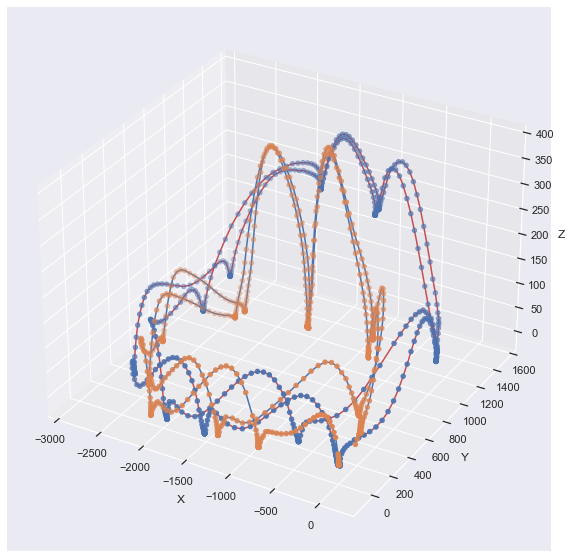

In [21]:
data = np.array(all_dict_setID['10th_D2SEW1_01'][['l-x', 'l-y', 'l-z']])
data1 = np.array(all_dict_setID['10th_D2SEW1_01'][['r-x', 'r-y', 'r-z']])


x = data[:, 0, np.newaxis] #.values[18:30]
y = data[:, 1, np.newaxis] 
z = data[:, 2, np.newaxis] #.values[18:30]

x1 = data1[:, 0, np.newaxis]
y1 = data1[:, 1, np.newaxis] 
z1 = data1[:, 2, np.newaxis]

point = (x, y, z)
point1 = (x1, y1, z1)
fig = visualization_3d(point, point1)


### Building machine learning algorithm

  #### Split Data 

      - Bulding Split Train and Test
  
  #### Building machine learning algorithm 
  
      - Logistic regression
      - Support vector machines
      - Linear SVC
      - KNN
      - Decision Tree
      - ....
      

In [22]:
ratio = 0.2
total_sample = len(all_dict_setID.keys())
return_sample = int(total_sample * ratio) + 1

print(f"The amount of sample: {total_sample}")
print(f"The amount of train data: {total_sample - return_sample}")
print(f"The amount of test data : {return_sample}")
print(f"Ratio: {ratio}")

The amount of sample: 129
The amount of train data: 103
The amount of test data : 26
Ratio: 0.2


In [23]:
test_index = np.random.choice(total_sample, return_sample, replace=False)
train_index = np.array(list(set(np.arange(total_sample)) - set(test_index)))

In [24]:
list_df_train = []
list_df_test = []
for index, (key, value) in enumerate(all_dict_setID.items()):
    if index in test_index:
        list_df_test.append(value)
    elif index in train_index:
        list_df_train.append(value)
    else:
        print("Error! Please checking ...")

In [26]:
data_train = pd.concat(list_df_train, axis=0, ignore_index=True)
data_test = pd.concat(list_df_test, axis=0, ignore_index=True)

# shuffle & replace index 
data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)

In [27]:
print(f"Length data train: {len(data_train)}")
print(f"Length data test: {len(data_test)}")

Length data train: 131986
Length data test: 32241


In [52]:
import lightgbm as lgm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold


In [29]:
columns_label = ['l-x', 'l-y', 'l-z', 
                 'r-x', 'r-y', 'r-z']

train_feature_vectors, train_labels = split_label(data_train, columns=columns_label)
test_feature_vectors, test_labels = split_label(data_test, columns=columns_label)

In [ ]:
############################## BUILDING MACHINE LEARNING ALGORITHM ########

In [108]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgm


In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
# Lasso
# GridSearchCV đã có sẵn cross_val_score

lasso_params = {'model__alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.035]}


lasso = Pipeline(steps=[
    ("preprocess", RobustScaler()),
    ("model", Lasso(alpha =0.0005, random_state=1)),
])

gs = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=kf, return_train_score=True)
gs.fit(train_feature_vectors, train_labels)

print("================= LASSO =========================")
print("Best Estimator: \n{}\n".format(gs.best_estimator_))
print("Best Parameters: \n{}\n".format(gs.best_params_))
print("Best Validate Score: \n{}\n".format(-1 * gs.best_score_))
print("Best Training Score: \n{}\n".format(-1 * gs.cv_results_['mean_train_score'][gs.best_index_]))
print("All Training Scores: \n{}\n".format(-1 * gs.cv_results_['mean_train_score']))
print("All Validate Scores: \n{}\n".format(-1 * gs.cv_results_['mean_test_score']))
print("Best Index Param: \n{}\n".format(gs.best_index_))


# predict test 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# https://stackoverflow.com/questions/52580023/how-to-get-the-best-estimator-parameters-out-from-pipelined-gridsearch-and-cro
test_prediction = gs.predict(test_feature_vectors)
mse_test = metrics.mean_squared_error(test_labels, test_prediction, multioutput='raw_values')
r2_test = metrics.r2_score(test_labels, test_prediction, multioutput='raw_values')
print("Test Scores: \n{}\n".format(mse_test))
print("Mean MSE Test Scores: \n{}\n".format(np.mean(mse_test)))
print("Mean R^2 Test Scores: \n{}\n".format(np.mean(r2_test)))
print("=================================================")

Best Estimator: 
Pipeline(steps=[('preprocess', RobustScaler()),
                ('model', Lasso(alpha=0.035, random_state=1))])

Best Parameters: 
{'model__alpha': 0.035}

Best Validate Score: 
407548.4725534147

Best Training Score: 
407122.9441835786

All Training Scores: 
[407122.86988915 407122.88575003 407122.89016692 407122.89476361
 407122.91495399 407122.94418358]

All Validate Scores: 
[407548.63474184 407548.58749686 407548.57615788 407548.56496977
 407548.52202144 407548.47255341]

Best Index Param: 
5

Test Scores: 
[940145.38438371 393557.86790464   5326.89461959 811326.80116793
 220935.6996131    5643.30067932]

Mean Test Scores: 
396155.99139471725



In [111]:
# RandomForest
random_params = {
    'model__n_estimators': [400, 700, 1000],
    'model__max_depth': [15,20,25],
    'model__max_leaf_nodes': [50, 100, 200]
}


model_random = RandomForestRegressor()

randomforest = Pipeline(steps=[
    ("preprocess", RobustScaler()),
    ("model", model_random),
])

gs_random = GridSearchCV(randomforest, param_grid=random_params,  scoring='neg_mean_squared_error', cv=kf, return_train_score=True)
gs_random.fit(train_feature_vectors, train_labels)


print("================= LASSO =========================")
print("Best Estimator: \n{}\n".format(gs_random.best_estimator_))
print("Best Parameters: \n{}\n".format(gs_random.best_params_))
print("Best Validate Score: \n{}\n".format(-1 * gs_random.best_score_))
print("Best Training Score: \n{}\n".format(-1 * gs_random.cv_results_['mean_train_score'][gs_random.best_index_]))
print("All Training Scores: \n{}\n".format(-1 * gs_random.cv_results_['mean_train_score']))
print("All Validate Scores: \n{}\n".format(-1 * gs_random.cv_results_['mean_test_score']))
print("Best Index Param: \n{}\n".format(gs_random.best_index_))


# predict test 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# https://stackoverflow.com/questions/52580023/how-to-get-the-best-estimator-parameters-out-from-pipelined-gridsearch-and-cro
test_prediction = gs_random.predict(test_feature_vectors)
mse_test = metrics.mean_squared_error(test_labels, test_prediction, multioutput='raw_values')
r2_test = metrics.r2_score(test_labels, test_prediction, multioutput='raw_values')
print("Test Scores: \n{}\n".format(mse_test))
print("Mean MSE Test Scores: \n{}\n".format(np.mean(mse_test)))
print("Mean R^2 Test Scores: \n{}\n".format(np.mean(r2_test)))
print("=================================================")


KeyboardInterrupt: 

In [104]:
# LightGBM
model_param = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'bagging_fraction':0.75,
    'bagging_freq':5, 
    'bagging_seed':7,
    'feature_fraction':0.7,
    'feature_fraction_seed':7,
    'n_jobs': -1,
}

lightgbm_params = {
    'model__estimator__MultiOutputRegressor__num_leaves': [7, 14, 21, 28, 31, 50],
    'model__estimator__learning_rate': [0.005, 0.002, 0.001],
    'model__estimator__max_depth': [6, 7, 8],
    'model__estimator__n_estimators': [50, 100, 200, 500],
}

model_lgb = lgm.LGBMRegressor(**model_param)
wapper = MultiOutputRegressor(estimator=model_lgb, n_jobs=-1)

lightgbm = Pipeline(steps=[
    ("preprocess", RobustScaler()),
    ("model", wapper),
])


lgm_gs = GridSearchCV(lightgbm, param_grid=lightgbm_params, scoring='neg_mean_squared_error', cv=kf, return_train_score=True)
lgm_gs.fit(train_feature_vectors, train_labels)

print("================= LIGHTGBM =========================")
print("Best Estimator: \n{}\n".format(lgm_gs.best_estimator_))
print("Best Parameters: \n{}\n".format(lgm_gs.best_params_))
print("Best Validate Score: \n{}\n".format(-1 * lgm_gs.best_score_))
print("Best Training Score: \n{}\n".format(-1 * lgm_gs.cv_results_['mean_train_score'][lgm_gs.best_index_]))
print("All Training Scores: \n{}\n".format(-1 * lgm_gs.cv_results_['mean_train_score']))
print("All Validate Scores: \n{}\n".format(-1 * lgm_gs.cv_results_['mean_test_score']))
print("Best Index Param: \n{}\n".format(lgm_gs.best_index_))

# predict test 
test_prediction = lgm_gs.predict(test_feature_vectors)
mse_test = metrics.mean_squared_error(test_labels, test_prediction, multioutput='raw_values')
r2_test = metrics.r2_score(test_labels, test_prediction, multioutput='raw_values')
print("Test Scores: \n{}\n".format(mse_test))
print("Mean MSE Test Scores: \n{}\n".format(np.mean(mse_test)))
print("Mean R^2 Test Scores: \n{}\n".format(np.mean(r2_test)))
print("=================================================")


[LightGBM] [Warning] Unknown parameter: MultiOutputRegressor__num_leaves
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: MultiOutputRegressor__num_leaves
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: MultiOutputRegressor__num_leaves
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. C

KeyboardInterrupt: 

In [112]:
# XGBoost
# https://mlfromscratch.com/gridsearch-keras-sklearn/#/
xgboost_params = {
    "model__estimator__learning_rate": (0.005, 0.001, 0.0001),
    'model__estimator__n_estimators': [400, 700, 1000],
    'model__estimator__colsample_bytree': [0.7, 0.8],
    'model__estimator__max_depth': [15,20,25],
    'model__estimator__reg_alpha': [1.1, 1.2, 1.3],
    'model__estimator__reg_lambda': [1.1, 1.2, 1.3],
    'model__estimator__subsample': [0.7, 0.8, 0.9]
}

model_xgb = xgb.XGBRegressor()
wapper = MultiOutputRegressor(estimator=model_xgb, n_jobs=-1)

xgboost = Pipeline(steps=[
    ("preprocess", RobustScaler()),
    ("model", wapper),
])


xgb_gs = GridSearchCV(xgboost, param_grid=xgboost_params, scoring='neg_mean_squared_error', cv=kf, return_train_score=True)
xgb_gs.fit(train_feature_vectors, train_labels)

print("================= XGBOOST =========================")
print("Best Estimator: \n{}\n".format(xgb_gs.best_estimator_))
print("Best Parameters: \n{}\n".format(xgb_gs.best_params_))
print("Best Validate Score: \n{}\n".format(-1 * xgb_gs.best_score_))
print("Best Training Score: \n{}\n".format(-1 * xgb_gs.cv_results_['mean_train_score'][xgb_gs.best_index_]))
print("All Training Scores: \n{}\n".format(-1 * xgb_gs.cv_results_['mean_train_score']))
print("All Validate Scores: \n{}\n".format(-1 * xgb_gs.cv_results_['mean_test_score']))
print("Best Index Param: \n{}\n".format(xgb_gs.best_index_))

# predict test 
test_prediction = xgb_gs.predict(test_feature_vectors)
mse_test = metrics.mean_squared_error(test_labels, test_prediction, multioutput='raw_values')
r2_test = metrics.r2_score(test_labels, test_prediction, multioutput='raw_values')
print("Test Scores: \n{}\n".format(mse_test))
print("Mean MSE Test Scores: \n{}\n".format(np.mean(mse_test)))
print("Mean R^2 Test Scores: \n{}\n".format(np.mean(r2_test)))
print("=================================================")

KeyboardInterrupt: 